<a href="https://colab.research.google.com/github/ulewis/FdD/blob/main/Balanceo%20ROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Extraemos datos
#data='/content/drive/MyDrive/Colab Notebooks/para volumen 4ta vuelta.csv'
data = "/content/drive/MyDrive/Colab Notebooks/para volumen 4ta vuelta.csv"

In [46]:
#visualizamos el dataset
df= pd.read_csv(data)
df.head()

,C,Rp,Dif_vol,V_in,V_out,P_ventilador,PIP,Error_aceptable
0,20,20,-2.7,350,352.7,27.6,25.5,1
1,20,20,-4.7,350,354.7,30.3,30.2,1
2,20,20,1.2,350,348.8,32.0,33.0,1
3,20,20,3.1,400,396.9,30.3,29.4,1
4,20,20,-7.0,400,407.0,33.9,34.3,1


In [47]:
#Revisamos dimension de la data
df.shape

(69, 8)

In [48]:
#filtramos decartando columnas con datos faltantes
d_filtrado = df.dropna().copy() 
#se utiliza para eliminar las filas o columnas con valores faltantes (NaN) de un DataFrame y realizar una copia del DataFrame resultante.

In [49]:
#Verificamos cuantos valores tenemos de Rp
d_filtrado.V_out.unique()

array([352.7, 354.7, 348.8, 396.9, 407. , 401.6, 442.2, 455.5, 451.2,
       482.2, 492. , 494.5, 541.7, 549.6, 558.5, 597.3, 599. , 612.5,
       327.8, 307.5, 303.2, 375. , 360.8, 358.6, 419.6, 408.8, 407.5,
       455.2, 457.3, 461.5, 518.2, 515.8, 524.4, 574. , 571.6, 296.8,
       281.3, 277.5, 335.2, 332.8, 330.7, 382. , 377. , 383. , 436.4,
       429.6, 436.5, 498.1, 496.1, 499.6, 552. , 548.8, 269. , 302.6,
       302.7, 303. , 344.1, 344.2, 389.1, 396.6, 386.5, 435.7, 452.7,
       487.9, 509.7, 527. , 544.5, 559.9])

In [50]:
#revisamos de la data filtrada
d_filtrado.shape

(69, 8)

In [51]:
#contar valores
d_filtrado['Error_aceptable'].value_counts()

1    53
0    16
Name: Error_aceptable, dtype: int64

In [52]:
#revisamos proporción
d_filtrado['Error_aceptable'].value_counts()/len(d_filtrado)

1    0.768116
0    0.231884
Name: Error_aceptable, dtype: float64

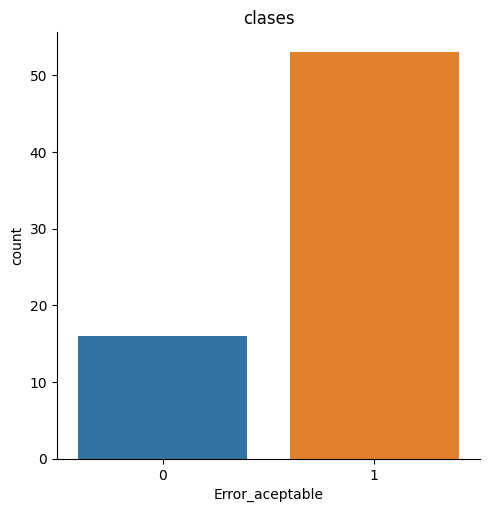

In [53]:
#observamos el desbalance de datos
p=sns.catplot(data = d_filtrado, kind ='count', x= 'Error_aceptable')
p.set(title = "clases")

In [54]:
# definimos la matriz de caracteristicas
x = d_filtrado.loc[:,["V_out","P_ventilador","PIP"]] #usamos estas 3 variables del dataframe
y = d_filtrado['Error_aceptable']
print(x)

    V_out  P_ventilador   PIP
0   352.7          27.6  25.5
1   354.7          30.3  30.2
2   348.8          32.0  33.0
3   396.9          30.3  29.4
4   407.0          33.9  34.3
..    ...           ...   ...
64  487.9          45.9  39.9
65  509.7          51.1  45.8
66  527.0          54.6  50.0
67  544.5          53.7  45.2
68  559.9          58.4  50.5

[69 rows x 3 columns]


In [55]:
print(len(y[y==0]))
print(len(y[y==1]))

16
53


In [56]:
#divimos la data en conjunto de entranimiento y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)
print(len(x_train),len(x_test))

51 18


In [57]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))


11
40


In [58]:
# Estandarización de características
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [59]:

print(df.head())

    C  Rp  Dif_vol  V_in  V_out  P_ventilador   PIP  Error_aceptable
0  20  20     -2.7   350  352.7          27.6  25.5                1
1  20  20     -4.7   350  354.7          30.3  30.2                1
2  20  20      1.2   350  348.8          32.0  33.0                1
3  20  20      3.1   400  396.9          30.3  29.4                1
4  20  20     -7.0   400  407.0          33.9  34.3                1


REGRESIÓN LOGISTICA

In [60]:
from sklearn.linear_model import LogisticRegression
regLog = LogisticRegression(random_state = 0)
regLog.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [61]:
# Se anñade una columna constante para el término de intercepción
x_train_with_const = sm.add_constant(x_train)

# Crear un modelo logístico con statsmodels
logit_model = sm.Logit(y_train, x_train_with_const)

# Ajustar el modelo
result = logit_model.fit()

# Obtener los coeficientes y los p-valores
coefficients = result.params
p_values = result.pvalues

print("Coeficientes:")
print(coefficients)
print("\nP-valores:")
print(p_values) #obtenemos valores de p menos a 0.05, se interpreta como evidencia suficiente para rechazar la hipótesis nula

Optimization terminated successfully.
         Current function value: 0.252189
         Iterations 9
Coeficientes:
const    3.755548
x1       5.645053
x2      -7.721013
x3       4.996409
dtype: float64

P-valores:
const    0.003028
x1       0.006041
x2       0.022088
x3       0.024184
dtype: float64


In [62]:
score = regLog.score(x_test, y_test)
round(score,4)

0.7778

In [63]:
y_pred = regLog.predict(x_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred)) #valores de precision, exactitud y f1_score antes de balancear los datos

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.76      1.00      0.87        13

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18



In [65]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1  4]
 [ 0 13]]


In [66]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Error_aceptable,,
0,1,4
1,0,13


In [67]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regLog, X = x_train, y=y_train, cv= 10)
accuracies.mean()

0.7866666666666666

In [68]:
accuracies

array([0.66666667, 0.4       , 0.8       , 1.        , 1.        ,
       0.6       , 0.8       , 0.8       , 0.8       , 1.        ])

In [69]:
# Con el código brindado no se puede plotear para 3 variables

# Creamos un plot para ver la frontera de clasificación

"""from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1,X2,X3 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,2].min()-1,stop = x_set[:,0].max()+1,step=0.01))

plt.contour3D(X1,X2,X3, regLog.predict(np.array([X1.ravel(),X2.ravel(),X3.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.ylim(X3.min(), X3.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],
                c = ListedColormap(('red','blue',"black"))(i),label = j)
    
plt.title('Clasificador')
plt.xlabel('V_in')
plt.ylabel('V_out')
plt.legend()
plt.show()"""




'from matplotlib.colors import ListedColormap\nx_set, y_set = x_test, y_test\nX1,X2,X3 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),\n                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,0].max()+1,step=0.01),\n                    np.arange(start = x_set[:,2].min()-1,stop = x_set[:,0].max()+1,step=0.01))\n\nplt.contour3D(X1,X2,X3, regLog.predict(np.array([X1.ravel(),X2.ravel(),X3.ravel()]).T).reshape(X1.shape),\n             alpha=0.75, cmap = ListedColormap((\'magenta\', \'cyan\')))\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nplt.ylim(X3.min(), X3.max())\nfor i,j in enumerate(np.unique(y_set)):\n    plt.scatter(x_set[y_set == j,0],x_set[y_set== j,1],\n                c = ListedColormap((\'red\',\'blue\',"black"))(i),label = j)\n    \nplt.title(\'Clasificador\')\nplt.xlabel(\'V_in\')\nplt.ylabel(\'V_out\')\nplt.legend()\nplt.show()'

**Balanceo ROS**

In [70]:
#ROS se refiere a una técnica utilizada para abordar el desequilibrio de clases en un conjunto de datos.
#El desequilibrio de clases ocurre cuando el número de instancias en una clase 
#es significativamente mayor o menor que el número de instancias en otra clase. 
#Esto puede ser problemático porque los algoritmos de aprendizaje automático tienden a tener sesgos
#hacia la predicción de la clase mayoritaria, lo que resulta en un bajo rendimiento en la clase minoritaria.


len(x_train)

51

In [71]:
train = np.concatenate([x_train, y_train.values.reshape(-1,1)], axis=1)

In [72]:
#transformamos a un dataFrame
train = pd.DataFrame(train,columns=["V_out","P_ventilador","PIP",'Error_aceptable'])

In [73]:
#obtenemos la clase con error que no se acepta
train_class_0 = train.query("Error_aceptable == 0")
train_class_0.head()

,V_out,P_ventilador,PIP,Error_aceptable
10,-0.994151,0.223825,0.439871,0.0
12,0.061645,0.960943,1.027543,0.0
13,-0.851101,-0.779474,-1.064570,0.0
16,-1.289859,-1.363025,-1.691421,0.0
20,-1.356046,-0.984229,-0.845173,0.0


In [74]:
train_class_0.shape

(11, 4)

In [75]:
n_class0 = len(train.query("Error_aceptable == 0"))
n_class1 = len(train.query("Error_aceptable == 1"))
print ( n_class0, n_class1)

11 40


In [76]:
i_class0_downsampled = train_class_0.sample(n_class1,replace = True) 
#oversampling para igualar la cantidad de datos de n_class0 y n_class1
len(i_class0_downsampled)

40

In [77]:
new_train = pd.concat([train.query("Error_aceptable == 1"), i_class0_downsampled], axis=0)
new_train[['Error_aceptable']].value_counts()

Error_aceptable
0.0                40
1.0                40
dtype: int64

In [78]:
new_x_train =new_train.loc[:,["V_out","P_ventilador","PIP"]].values
new_y_train =new_train.loc[:,['Error_aceptable']].values


In [79]:
new_y_train = pd.Series(new_y_train.reshape(-1,))

In [80]:
new_train.loc[:,['Error_aceptable']].value_counts()

Error_aceptable
0.0                40
1.0                40
dtype: int64

Nuevo modelo con nueva data

In [81]:
model= LogisticRegression()
model. fit(new_x_train, new_y_train)

LogisticRegression()

In [82]:
y_pred2 = model.predict(x_test)

In [83]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred2))
# f1-score Métrica comúnmente utilizada para evaluar el rendimiento del modelo de clasificación. 
#El puntaje F1 combina precisión y exhaustividad en una única medida y proporciona una evaluación equilibrada de 
#la capacidad del modelo para clasificar correctamente tanto las instancias positivas como las negativas.

# se observa como el valor de f1 score mejora en el modelo balanceado por ROS a comparación del modelo original

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.76      1.00      0.87        13

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.85      0.92        13

    accuracy                           0.89        18
   macro avg       0.86      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18

